In [1]:
# let's import my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# let's do the import of our library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random

In [3]:
# let's load the data in a dataframe
df = pd.read_csv("/content/drive/MyDrive/Call_Center_Project/call_center.csv", dtype={'day_of_week': 'category', 'incoming_calls': 'int32', 'answered_calls': 'int32', 'abandoned_calls': 'int32', 'answer_speed(seconds)': 'int32', 'talk_duration(seconds)': 'int32', 'waiting_time(seconds)': 'int32'}, parse_dates=['date'])

In [4]:
#Procédons à une petite vérification de notre chargement
df.head()

,date,incoming_calls,answered_calls,answer_rate,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate,day_of_week,month
0,2021-01-01,217,204,94.01,13,17,134,165,76.28,Friday,January
1,2021-01-02,200,182,91.00,18,20,142,415,72.73,Saturday,January
2,2021-01-03,216,198,91.67,18,18,158,230,74.30,Sunday,January
3,2021-01-04,155,145,93.55,10,15,149,192,79.61,Monday,January
4,2021-01-05,37,37,100.00,0,3,126,35,97.30,Tuesday,January


In [5]:
df.dtypes

,0
date,datetime64[ns]
incoming_calls,int32
answered_calls,int32
answer_rate,float64
abandoned_calls,int32
answer_speed(seconds),int32
talk_duration(seconds),int32
waiting_time(seconds),int32
service_level_rate,float64
day_of_week,category


**Pleogeons nous dans ce notebook dans l'analyse de nos données et a leur exploration pour la confection du report**

In [6]:
df.head()

,date,incoming_calls,answered_calls,answer_rate,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate,day_of_week,month
0,2021-01-01,217,204,94.01,13,17,134,165,76.28,Friday,January
1,2021-01-02,200,182,91.00,18,20,142,415,72.73,Saturday,January
2,2021-01-03,216,198,91.67,18,18,158,230,74.30,Sunday,January
3,2021-01-04,155,145,93.55,10,15,149,192,79.61,Monday,January
4,2021-01-05,37,37,100.00,0,3,126,35,97.30,Tuesday,January


In [7]:
df.tail()

,date,incoming_calls,answered_calls,answer_rate,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate,day_of_week,month
360,2021-12-27,127,116,91.34,11,34,145,166,56.45,Monday,December
361,2021-12-28,93,90,96.77,3,26,117,177,63.44,Tuesday,December
362,2021-12-29,328,292,89.02,36,37,137,385,49.68,Wednesday,December
363,2021-12-30,238,223,93.70,15,33,143,220,59.23,Thursday,December
364,2021-12-31,237,222,93.67,15,34,144,172,53.85,Friday,December


In [8]:
df.head()

,date,incoming_calls,answered_calls,answer_rate,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate,day_of_week,month
0,2021-01-01,217,204,94.01,13,17,134,165,76.28,Friday,January
1,2021-01-02,200,182,91.00,18,20,142,415,72.73,Saturday,January
2,2021-01-03,216,198,91.67,18,18,158,230,74.30,Sunday,January
3,2021-01-04,155,145,93.55,10,15,149,192,79.61,Monday,January
4,2021-01-05,37,37,100.00,0,3,126,35,97.30,Tuesday,January


# **Analyse Descriptive générale**

In [9]:
# résumé statistique des données numériques
# créons d'abord un dataframe contenant uniquement les données numériques
df_n = df.select_dtypes(include='number')

In [10]:
stat = df_n.describe()

In [11]:
stat

,incoming_calls,answered_calls,answer_rate,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,174.778082,166.147945,95.398356,8.630137,18.684932,138.090411,171.243836,76.878110
std,93.794770,87.745574,3.955952,10.058219,8.553447,15.223429,103.519140,12.020612
min,5.000000,5.000000,64.630000,0.000000,2.000000,57.000000,3.000000,28.310000
25%,134.000000,132.000000,94.010000,3.000000,12.000000,131.000000,105.000000,70.370000
50%,181.000000,174.000000,96.100000,6.000000,18.000000,139.000000,150.000000,77.780000
75%,214.000000,202.000000,97.910000,11.000000,24.000000,145.000000,220.000000,85.000000
max,822.000000,767.000000,100.000000,105.000000,57.000000,217.000000,641.000000,100.000000


In [12]:
# Passons aux colonnes catégorielles
df_c = df.select_dtypes(include=['category', 'object'])

In [13]:
df_c

,day_of_week,month
0,Friday,January
1,Saturday,January
2,Sunday,January
3,Monday,January
4,Tuesday,January
...,...,...
360,Monday,December
361,Tuesday,December
362,Wednesday,December
363,Thursday,December


In [14]:
df_c.describe()

,day_of_week,month
count,365,365
unique,7,12
top,Friday,January
freq,53,31


# **Distribution des variables numériques**

In [15]:
df_n.head()

,incoming_calls,answered_calls,answer_rate,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate
0,217,204,94.01,13,17,134,165,76.28
1,200,182,91.00,18,20,142,415,72.73
2,216,198,91.67,18,18,158,230,74.30
3,155,145,93.55,10,15,149,192,79.61
4,37,37,100.00,0,3,126,35,97.30


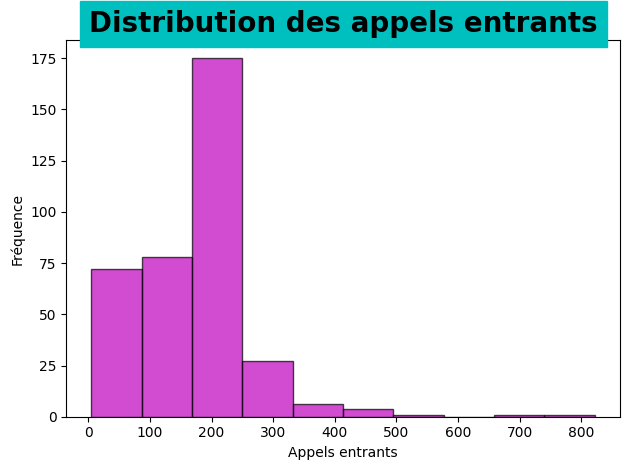

In [16]:
# incoming_calls
plt.figure()
plt.hist(x=df['incoming_calls'], color='m', alpha=0.7, edgecolor='k')
plt.title("Distribution des appels entrants", fontweight='bold', backgroundcolor='c', fontsize=20)
plt.xlabel('Appels entrants')
plt.ylabel("Fréquence")
plt.tight_layout()
plt.savefig('incoming_calls_dist.png', dpi=300)
plt.show()

**On remarque là une distribution asymétrique à droite avec une forte influence sur la moyenne des données, aussi cette asymétrie notoire indique là la présence de périodes de pics d'activités**

In [17]:
df_n.head()

,incoming_calls,answered_calls,answer_rate,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate
0,217,204,94.01,13,17,134,165,76.28
1,200,182,91.00,18,20,142,415,72.73
2,216,198,91.67,18,18,158,230,74.30
3,155,145,93.55,10,15,149,192,79.61
4,37,37,100.00,0,3,126,35,97.30


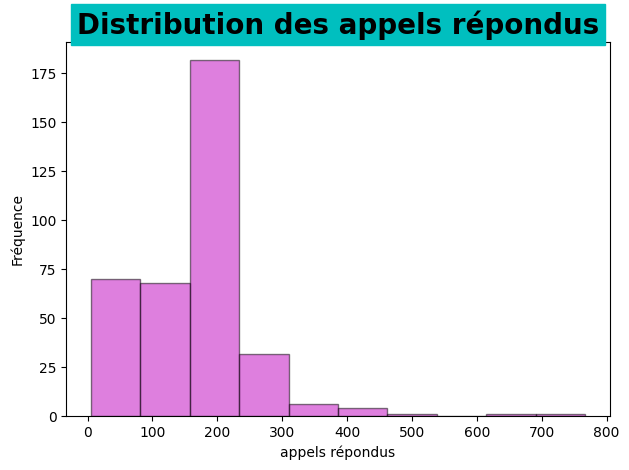

In [18]:
# answered_calls
plt.figure()
plt.hist(x=df['answered_calls'], color='m', alpha=0.5, edgecolor='k')
plt.title("Distribution des appels répondus", fontsize=20, fontweight='bold', backgroundcolor='c')
plt.xlabel('appels répondus')
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()

Ici on remarque une distribution quasiment indentique, signe d'une corrélation assez importante

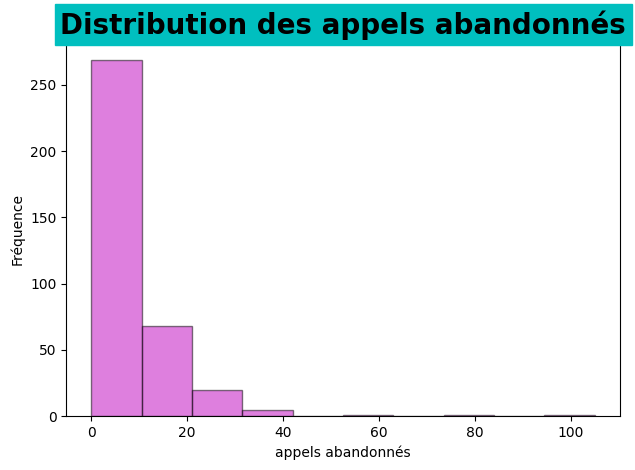

In [19]:
# abandoned_calls
plt.figure()
plt.hist(x=df['abandoned_calls'], color='m', alpha=0.5, edgecolor='k')
plt.title("Distribution des appels abandonnés", fontsize=20, fontweight='bold', backgroundcolor='c')
plt.xlabel("appels abandonnés")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.savefig('abandoned_dist.png', dpi=300)
plt.show()

**Là encore on a à faire a une distribution asymétrique à droite, avec une concentration des valeurs entre 0 et 20 signe d'une performance plutôt bonne des agents et des valeurs atypiques qui nécessitent de pousser les investigations**

In [20]:
df[df['abandoned_calls'] >= 50]

,date,incoming_calls,answered_calls,answer_rate,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate,day_of_week,month
236,2021-08-25,229,148,64.63,81,36,168,639,43.18,Wednesday,August
240,2021-08-29,822,767,93.31,55,24,85,275,64.40,Sunday,August
351,2021-12-18,721,616,85.44,105,57,115,348,28.31,Saturday,December


In [21]:
df[df['month'] == 'August'].sample(n=10)

,date,incoming_calls,answered_calls,answer_rate,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate,day_of_week,month
217,2021-08-06,229,210,91.70,19,29,143,496,64.16,Friday,August
238,2021-08-27,175,168,96.00,7,25,171,224,65.12,Friday,August
227,2021-08-16,126,121,96.03,5,21,152,111,70.63,Monday,August
215,2021-08-04,209,200,95.69,9,23,144,131,66.67,Wednesday,August
242,2021-08-31,41,39,95.12,2,15,162,78,82.50,Tuesday,August
221,2021-08-10,52,49,94.23,3,18,138,137,76.47,Tuesday,August
212,2021-08-01,129,124,96.12,5,23,148,110,70.87,Sunday,August
226,2021-08-15,204,194,95.10,10,18,153,122,82.41,Sunday,August
231,2021-08-20,155,151,97.42,4,21,140,165,70.97,Friday,August
234,2021-08-23,167,136,81.44,31,42,156,328,35.98,Monday,August


In [22]:
stat

,incoming_calls,answered_calls,answer_rate,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,174.778082,166.147945,95.398356,8.630137,18.684932,138.090411,171.243836,76.878110
std,93.794770,87.745574,3.955952,10.058219,8.553447,15.223429,103.519140,12.020612
min,5.000000,5.000000,64.630000,0.000000,2.000000,57.000000,3.000000,28.310000
25%,134.000000,132.000000,94.010000,3.000000,12.000000,131.000000,105.000000,70.370000
50%,181.000000,174.000000,96.100000,6.000000,18.000000,139.000000,150.000000,77.780000
75%,214.000000,202.000000,97.910000,11.000000,24.000000,145.000000,220.000000,85.000000
max,822.000000,767.000000,100.000000,105.000000,57.000000,217.000000,641.000000,100.000000


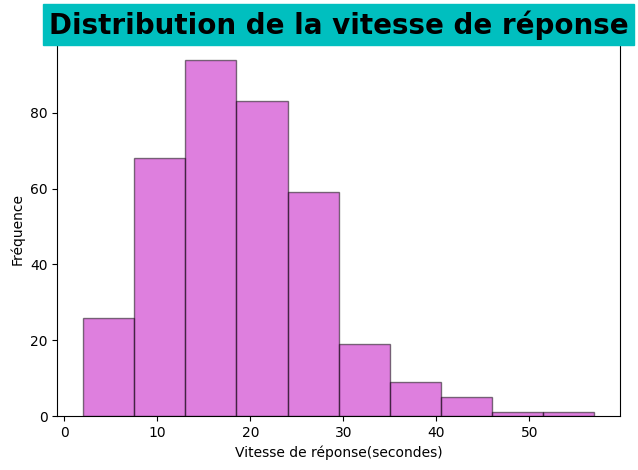

In [23]:
# answer_speed
plt.figure()
plt.hist(x=df['answer_speed(seconds)'], color='m', edgecolor='k', alpha=0.5)
plt.title("Distribution de la vitesse de réponse", fontsize=20, fontweight='bold', backgroundcolor='c')
plt.xlabel("Vitesse de réponse(secondes)")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.savefig("answer_time_dist.png", dpi=300)
plt.show()

**Là également on a une asymétrie, mais qui est moindre signe d'une présence limitée de valeurs atypiques avec un pic compris entre 10 et 30 secondes signes d'une performance relativement bonne avec néanmoins des valeurs qui méritent des investigations plus poussée**

In [24]:
df[df['answer_speed(seconds)'] >= 35]

,date,incoming_calls,answered_calls,answer_rate,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate,day_of_week,month
232,2021-08-21,169,137,81.07,32,38,144,330,40.36,Saturday,August
234,2021-08-23,167,136,81.44,31,42,156,328,35.98,Monday,August
235,2021-08-24,32,27,84.38,5,35,142,190,53.13,Tuesday,August
236,2021-08-25,229,148,64.63,81,36,168,639,43.18,Wednesday,August
280,2021-10-08,346,305,88.15,41,45,117,307,45.03,Friday,October
292,2021-10-20,291,250,85.91,41,41,140,430,55.44,Wednesday,October
320,2021-11-17,218,187,85.78,31,48,135,313,52.11,Wednesday,November
329,2021-11-26,182,153,84.07,29,38,137,641,53.89,Friday,November
333,2021-11-30,60,58,96.67,2,37,156,190,54.24,Tuesday,November
340,2021-12-07,40,35,87.50,5,40,155,192,47.50,Tuesday,December


**Très intéressant on remarque que les vitesses de réponse atypique qui ont été remarqués coïncident avec les périodes de forte activité, cela suggère une mauvaise gestion lors des périodes de rush**

In [25]:
stat

,incoming_calls,answered_calls,answer_rate,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,174.778082,166.147945,95.398356,8.630137,18.684932,138.090411,171.243836,76.878110
std,93.794770,87.745574,3.955952,10.058219,8.553447,15.223429,103.519140,12.020612
min,5.000000,5.000000,64.630000,0.000000,2.000000,57.000000,3.000000,28.310000
25%,134.000000,132.000000,94.010000,3.000000,12.000000,131.000000,105.000000,70.370000
50%,181.000000,174.000000,96.100000,6.000000,18.000000,139.000000,150.000000,77.780000
75%,214.000000,202.000000,97.910000,11.000000,24.000000,145.000000,220.000000,85.000000
max,822.000000,767.000000,100.000000,105.000000,57.000000,217.000000,641.000000,100.000000


In [26]:
df['talk_duration(seconds)'].value_counts()

,count
talk_duration(seconds),
142,17
143,17
145,17
144,16
135,15
...,...
164,1
100,1
109,1


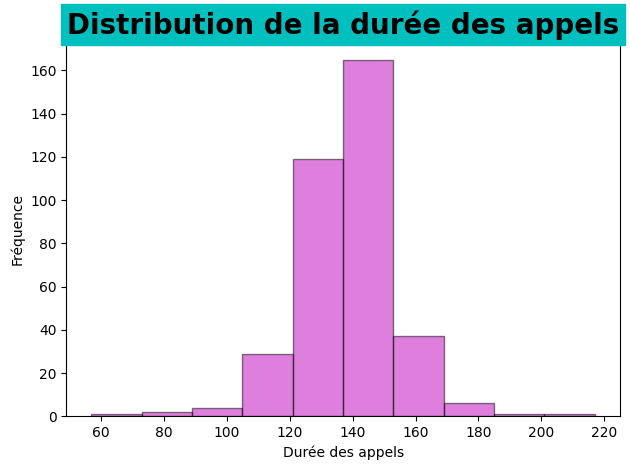

In [27]:
# talk_duration
plt.figure()
plt.hist(x=df['talk_duration(seconds)'], color='m', alpha=0.5, edgecolor='k')
plt.title("Distribution de la durée des appels", fontsize=20, fontweight='bold', backgroundcolor='c')
plt.xlabel("Durée des appels")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()

**On voit dans ce cas une distribution leptokurtique avec une platicité inférieure a celle d'une distribution normale et une présence de queues épaisses signe d'une présence de valeurs atypiques, notons également un très légère asymétrie, on constate aussi que les données sont concentrées entre 100 et 150 secondes environs signe d'une efficacité plutôt bonne des employés**

In [28]:
df[(df['talk_duration(seconds)'] >= 60) & (df['talk_duration(seconds)'] <= 90)]

,date,incoming_calls,answered_calls,answer_rate,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate,day_of_week,month
185,2021-07-05,547,526,96.16,21,19,81,234,81.58,Monday,July
240,2021-08-29,822,767,93.31,55,24,85,275,64.40,Sunday,August


In [29]:
df[(df['talk_duration(seconds)'] >= 160)]

,date,incoming_calls,answered_calls,answer_rate,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate,day_of_week,month
19,2021-01-20,218,194,88.99,24,26,163,388,68.98,Wednesday,January
27,2021-01-28,86,79,91.86,7,32,163,280,61.63,Thursday,January
38,2021-02-08,227,219,96.48,8,15,164,235,83.63,Monday,February
158,2021-06-08,21,21,100.00,0,7,178,58,95.24,Tuesday,June
165,2021-06-15,17,17,100.00,0,21,160,58,76.47,Tuesday,June
178,2021-06-28,139,133,95.68,6,17,160,183,80.15,Monday,June
193,2021-07-13,12,12,100.00,0,25,217,88,66.67,Tuesday,July
207,2021-07-27,29,27,93.10,2,19,167,142,78.57,Tuesday,July
233,2021-08-22,61,45,73.77,16,32,169,330,40.98,Sunday,August
236,2021-08-25,229,148,64.63,81,36,168,639,43.18,Wednesday,August


In [30]:
stat

,incoming_calls,answered_calls,answer_rate,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,174.778082,166.147945,95.398356,8.630137,18.684932,138.090411,171.243836,76.878110
std,93.794770,87.745574,3.955952,10.058219,8.553447,15.223429,103.519140,12.020612
min,5.000000,5.000000,64.630000,0.000000,2.000000,57.000000,3.000000,28.310000
25%,134.000000,132.000000,94.010000,3.000000,12.000000,131.000000,105.000000,70.370000
50%,181.000000,174.000000,96.100000,6.000000,18.000000,139.000000,150.000000,77.780000
75%,214.000000,202.000000,97.910000,11.000000,24.000000,145.000000,220.000000,85.000000
max,822.000000,767.000000,100.000000,105.000000,57.000000,217.000000,641.000000,100.000000


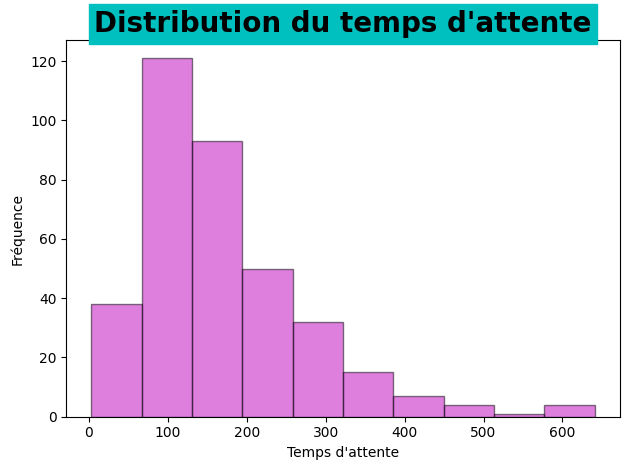

In [31]:
# waiting_time
plt.figure()
plt.hist(x=df['waiting_time(seconds)'], color='m', edgecolor='k', alpha=0.5)
plt.title("Distribution du temps d'attente", fontsize=20, fontweight='bold', backgroundcolor='c')
plt.xlabel("Temps d'attente")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()

**Nous remarquons ici une asymétrie positive légère avec des valeurs atypiques qui tirent la moyenne vers la droite et une concentration des valeurs à gauche de cette dernière, le temps d'attente le plus fréquent se situe notamment entre 100 et 200 secondes soit environ 2 minutes a plus de 3 minutes ce qui est rend le service client relativement mauvais, des investigations plus poussées sont une fois de pus nécessaire pour comprendre la présence de valeurs atypiques**

In [32]:
df[df['waiting_time(seconds)'] > 400]

,date,incoming_calls,answered_calls,answer_rate,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate,day_of_week,month
1,2021-01-02,200,182,91.00,18,20,142,415,72.73,Saturday,January
36,2021-02-06,218,189,86.70,29,32,157,484,57.41,Saturday,February
41,2021-02-11,137,130,94.89,7,16,146,587,75.91,Thursday,February
184,2021-07-04,483,451,93.37,32,16,57,525,79.20,Sunday,July
217,2021-08-06,229,210,91.70,19,29,143,496,64.16,Friday,August
236,2021-08-25,229,148,64.63,81,36,168,639,43.18,Wednesday,August
243,2021-09-01,280,257,91.79,23,31,153,475,63.87,Wednesday,September
292,2021-10-20,291,250,85.91,41,41,140,430,55.44,Wednesday,October
308,2021-11-05,223,208,93.27,15,28,141,411,72.27,Friday,November
317,2021-11-14,189,179,94.71,10,22,130,401,78.07,Sunday,November


In [33]:
df[(df['waiting_time(seconds)'] >= 100) & (df['waiting_time(seconds)'] <= 250)].sample(n=10)

,date,incoming_calls,answered_calls,answer_rate,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate,day_of_week,month
259,2021-09-17,171,164,95.91,7,19,142,229,77.19,Friday,September
155,2021-06-05,75,74,98.67,1,15,133,198,84.00,Saturday,June
354,2021-12-21,45,45,100.00,0,16,131,201,86.67,Tuesday,December
164,2021-06-14,122,119,97.54,3,16,144,110,80.00,Monday,June
279,2021-10-07,182,174,95.60,8,32,136,236,60.22,Thursday,October
76,2021-03-18,226,216,95.58,10,13,135,106,81.45,Thursday,March
175,2021-06-25,165,156,94.55,9,25,141,158,70.55,Friday,June
181,2021-07-01,207,190,91.79,17,21,143,246,71.36,Thursday,July
300,2021-10-28,382,365,95.55,17,20,95,173,73.14,Thursday,October
298,2021-10-26,56,55,98.21,1,26,131,113,66.07,Tuesday,October


In [34]:
df[(df['waiting_time(seconds)'] <= 100) & ((df['day_of_week'] == 'Tuesday' ) | (df['day_of_week'] == 'Monday'))]

,date,incoming_calls,answered_calls,answer_rate,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate,day_of_week,month
4,2021-01-05,37,37,100.00,0,3,126,35,97.30,Tuesday,January
11,2021-01-12,32,32,100.00,0,2,123,3,100.00,Tuesday,January
18,2021-01-19,45,44,97.78,1,2,124,55,97.78,Tuesday,January
25,2021-01-26,58,57,98.28,1,4,146,58,94.83,Tuesday,January
39,2021-02-09,52,52,100.00,0,9,136,52,94.23,Tuesday,February
45,2021-02-15,262,260,99.24,2,8,151,73,90.80,Monday,February
53,2021-02-23,58,58,100.00,0,6,142,52,94.83,Tuesday,February
73,2021-03-15,157,156,99.36,1,9,144,53,92.95,Monday,March
74,2021-03-16,38,36,94.74,2,13,131,59,83.78,Tuesday,March
80,2021-03-22,83,82,98.80,1,7,123,76,95.18,Monday,March


In [35]:
stat

,incoming_calls,answered_calls,answer_rate,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,174.778082,166.147945,95.398356,8.630137,18.684932,138.090411,171.243836,76.878110
std,93.794770,87.745574,3.955952,10.058219,8.553447,15.223429,103.519140,12.020612
min,5.000000,5.000000,64.630000,0.000000,2.000000,57.000000,3.000000,28.310000
25%,134.000000,132.000000,94.010000,3.000000,12.000000,131.000000,105.000000,70.370000
50%,181.000000,174.000000,96.100000,6.000000,18.000000,139.000000,150.000000,77.780000
75%,214.000000,202.000000,97.910000,11.000000,24.000000,145.000000,220.000000,85.000000
max,822.000000,767.000000,100.000000,105.000000,57.000000,217.000000,641.000000,100.000000


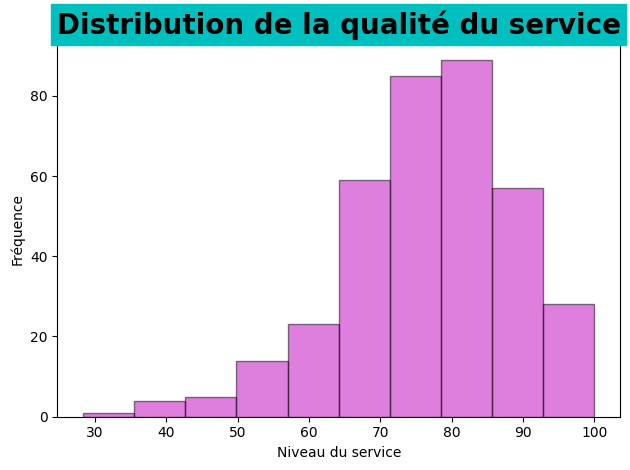

In [36]:
# service_level_rate
plt.figure()
plt.hist(x=df['service_level_rate'], color='m', alpha=0.5, edgecolor='k')
plt.title("Distribution de la qualité du service", fontsize=20, fontweight='bold', backgroundcolor='c')
plt.xlabel("Niveau du service")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()

**On a là une asymétrie a gauche plutôt prononcée avec une concentration des données a droite notamment entre 70 et environ 85 % signe d'une efficacité de nos agents et d'une bonne réactivité de ces derniers, sans distribution relativement dispersé signe d'une hétérogénéité dans l'efficacité de nos employés. Notons également la présence de valeurs anormales qui nécessiteront des investigations plus poussées**

# **Procédons maintenant a une agrégation de nos données par période**

In [37]:
# Procédons a une agrégation par mois
df.head()

,date,incoming_calls,answered_calls,answer_rate,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate,day_of_week,month
0,2021-01-01,217,204,94.01,13,17,134,165,76.28,Friday,January
1,2021-01-02,200,182,91.00,18,20,142,415,72.73,Saturday,January
2,2021-01-03,216,198,91.67,18,18,158,230,74.30,Sunday,January
3,2021-01-04,155,145,93.55,10,15,149,192,79.61,Monday,January
4,2021-01-05,37,37,100.00,0,3,126,35,97.30,Tuesday,January


In [38]:
df_n.head()

,incoming_calls,answered_calls,answer_rate,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate
0,217,204,94.01,13,17,134,165,76.28
1,200,182,91.00,18,20,142,415,72.73
2,216,198,91.67,18,18,158,230,74.30
3,155,145,93.55,10,15,149,192,79.61
4,37,37,100.00,0,3,126,35,97.30


In [39]:
# allons y d'abord avec un groupby
df_mois = df.groupby(by='month')[['incoming_calls', 'answered_calls', 'abandoned_calls']].sum()
df_mois_sorted = df.groupby(by='month')[['incoming_calls', 'answered_calls', 'abandoned_calls']].sum().sort_values(by=['incoming_calls', 'answered_calls'], ascending=False)

In [40]:
df_mois_sorted

,incoming_calls,answered_calls,abandoned_calls
month,,,
December,6634,6116,518
October,6459,6101,358
August,5889,5424,465
January,5805,5468,337
July,5801,5522,279
May,5379,5244,135
February,5372,5222,150
September,4894,4667,227
November,4788,4470,318


In [41]:
df.columns.tolist()

['date',
 'incoming_calls',
 'answered_calls',
 'answer_rate',
 'abandoned_calls',
 'answer_speed(seconds)',
 'talk_duration(seconds)',
 'waiting_time(seconds)',
 'service_level_rate',
 'day_of_week',
 'month']

In [42]:
# maintenant procédons par jours de la semaine
df_day = df.groupby(by='day_of_week')[['incoming_calls', 'answered_calls', 'abandoned_calls']].sum().sort_values(by='incoming_calls', ascending=False)

<ipython-input-42-228322149f98>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_day = df.groupby(by='day_of_week')[['incoming_calls', 'answered_calls', 'abandoned_calls']].sum().sort_values(by='incoming_calls', ascending=False)


In [43]:
df_day

,incoming_calls,answered_calls,abandoned_calls
day_of_week,,,
Wednesday,11028,10385,643
Friday,10454,9924,530
Saturday,10369,9827,542
Sunday,10257,9726,531
Thursday,10077,9641,436
Monday,9413,9029,384
Tuesday,2196,2112,84


In [44]:
# modifions le df_n pour inclure la colonne  date
df_n = df.select_dtypes(include=['datetime', 'number'])

In [45]:
# on va séparer le dataframe en colonne int et en pourcentage pour avoir des agrégations différentes et ensuite procédé à une fusion de ces deux dataframes
df_int = df.select_dtypes(include=['datetime', 'int'])
df_int

,date,incoming_calls,answered_calls,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds)
0,2021-01-01,217,204,13,17,134,165
1,2021-01-02,200,182,18,20,142,415
2,2021-01-03,216,198,18,18,158,230
3,2021-01-04,155,145,10,15,149,192
4,2021-01-05,37,37,0,3,126,35
...,...,...,...,...,...,...,...
360,2021-12-27,127,116,11,34,145,166
361,2021-12-28,93,90,3,26,117,177
362,2021-12-29,328,292,36,37,137,385
363,2021-12-30,238,223,15,33,143,220


In [46]:
# Procedons a l'agrégation par mois en utilisant la somme
df_monthly_sum = df_int.resample(rule='M', on='date').sum()
df_monthly_sum.head()

<ipython-input-46-2b1c52956774>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_sum = df_int.resample(rule='M', on='date').sum()


,incoming_calls,answered_calls,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds)
date,,,,,,
2021-01-31,5805,5468,337,438,4120,6441
2021-02-28,5372,5222,150,351,3929,4630
2021-03-31,4418,4291,127,340,4001,3999
2021-04-30,4785,4680,105,325,3938,3003
2021-05-31,5379,5244,135,454,4199,3568


In [47]:
df_float = df.select_dtypes(include=['datetime', 'float'])
df_float

,date,answer_rate,service_level_rate
0,2021-01-01,94.01,76.28
1,2021-01-02,91.00,72.73
2,2021-01-03,91.67,74.30
3,2021-01-04,93.55,79.61
4,2021-01-05,100.00,97.30
...,...,...,...
360,2021-12-27,91.34,56.45
361,2021-12-28,96.77,63.44
362,2021-12-29,89.02,49.68
363,2021-12-30,93.70,59.23


In [48]:
# Ici on va procéder a une agrégation des colonnes de notre dataframe selon leur type pour avoir une cohérence
# Là en l'occurence la moyenne est plus adaptée pour des colonnes qui représente des pourcentages
df_rate = df_float.resample(rule='M', on='date').mean()
df_rate.head()

<ipython-input-48-81e87add9782>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_rate = df_float.resample(rule='M', on='date').mean()


,answer_rate,service_level_rate
date,,
2021-01-31,94.693548,81.481290
2021-02-28,97.331071,85.356071
2021-03-31,96.591290,86.416774
2021-04-30,97.845000,87.644667
2021-05-31,97.313548,83.018065


In [49]:
# On va maintenant séparer df_int pour agréger de manière plus efficiente les colonnes qui représente des durées
df_time = df_int.loc[:, ['date', 'answer_speed(seconds)', 'talk_duration(seconds)', 'waiting_time(seconds)']]
df_time.head()

,date,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds)
0,2021-01-01,17,134,165
1,2021-01-02,20,142,415
2,2021-01-03,18,158,230
3,2021-01-04,15,149,192
4,2021-01-05,3,126,35


In [50]:
df_time.tail()

,date,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds)
360,2021-12-27,34,145,166
361,2021-12-28,26,117,177
362,2021-12-29,37,137,385
363,2021-12-30,33,143,220
364,2021-12-31,34,144,172


In [51]:
# Maintenant procédons à l'agrégation avec la moyenne
df_time_mean = df_time.resample(rule='M', on='date').mean()
df_time_mean.head()

<ipython-input-51-fa5161ec13bd>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_time_mean = df_time.resample(rule='M', on='date').mean()


,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds)
date,,,
2021-01-31,14.129032,132.903226,207.774194
2021-02-28,12.535714,140.321429,165.357143
2021-03-31,10.967742,129.064516,129.000000
2021-04-30,10.833333,131.266667,100.100000
2021-05-31,14.645161,135.451613,115.096774


In [52]:
df_int.columns

Index(['date', 'incoming_calls', 'answered_calls', 'abandoned_calls',
       'answer_speed(seconds)', 'talk_duration(seconds)',
       'waiting_time(seconds)'],
      dtype='object')

In [53]:
df_int.head()

,date,incoming_calls,answered_calls,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds)
0,2021-01-01,217,204,13,17,134,165
1,2021-01-02,200,182,18,20,142,415
2,2021-01-03,216,198,18,18,158,230
3,2021-01-04,155,145,10,15,149,192
4,2021-01-05,37,37,0,3,126,35


In [54]:
# Maintenant agrégeons df_int avec une somme pour plus de précision
df_int_sum = df_int.resample(rule='M', on='date').sum()
df_int_sum.head()

<ipython-input-54-c62c0c909e60>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_int_sum = df_int.resample(rule='M', on='date').sum()


,incoming_calls,answered_calls,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds)
date,,,,,,
2021-01-31,5805,5468,337,438,4120,6441
2021-02-28,5372,5222,150,351,3929,4630
2021-03-31,4418,4291,127,340,4001,3999
2021-04-30,4785,4680,105,325,3938,3003
2021-05-31,5379,5244,135,454,4199,3568


In [55]:
df_int_sum = df_int_sum.iloc[:, 0:3]

In [56]:
df_int_sum.head()

,incoming_calls,answered_calls,abandoned_calls
date,,,
2021-01-31,5805,5468,337
2021-02-28,5372,5222,150
2021-03-31,4418,4291,127
2021-04-30,4785,4680,105
2021-05-31,5379,5244,135


In [57]:
# Maintenant procédons a la fusion
df_int_time = df_int_sum.merge(df_time_mean, how='inner', on='date')

In [58]:
# Vérifions maintenant
df_int_time

,incoming_calls,answered_calls,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds)
date,,,,,,
2021-01-31,5805,5468,337,14.129032,132.903226,207.774194
2021-02-28,5372,5222,150,12.535714,140.321429,165.357143
2021-03-31,4418,4291,127,10.967742,129.064516,129.000000
2021-04-30,4785,4680,105,10.833333,131.266667,100.100000
2021-05-31,5379,5244,135,14.645161,135.451613,115.096774
2021-06-30,3570,3439,131,17.566667,143.833333,144.633333
2021-07-31,5801,5522,279,20.483871,141.064516,160.354839
2021-08-31,5889,5424,465,24.709677,145.064516,222.290323
2021-09-30,4894,4667,227,19.933333,148.233333,165.133333


In [59]:
df_time_mean.head()

,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds)
date,,,
2021-01-31,14.129032,132.903226,207.774194
2021-02-28,12.535714,140.321429,165.357143
2021-03-31,10.967742,129.064516,129.000000
2021-04-30,10.833333,131.266667,100.100000
2021-05-31,14.645161,135.451613,115.096774


In [60]:
df_int_sum.head()

,incoming_calls,answered_calls,abandoned_calls
date,,,
2021-01-31,5805,5468,337
2021-02-28,5372,5222,150
2021-03-31,4418,4291,127
2021-04-30,4785,4680,105
2021-05-31,5379,5244,135


In [61]:
# et enfin ajoutons les colonnes de pourcentages
df_final = df_int_time.merge(df_rate, how='inner', on='date')

In [62]:
df_final.head()

,incoming_calls,answered_calls,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),answer_rate,service_level_rate
date,,,,,,,,
2021-01-31,5805,5468,337,14.129032,132.903226,207.774194,94.693548,81.481290
2021-02-28,5372,5222,150,12.535714,140.321429,165.357143,97.331071,85.356071
2021-03-31,4418,4291,127,10.967742,129.064516,129.000000,96.591290,86.416774
2021-04-30,4785,4680,105,10.833333,131.266667,100.100000,97.845000,87.644667
2021-05-31,5379,5244,135,14.645161,135.451613,115.096774,97.313548,83.018065


In [63]:
df_final.tail()

,incoming_calls,answered_calls,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),answer_rate,service_level_rate
date,,,,,,,,
2021-08-31,5889,5424,465,24.709677,145.064516,222.290323,91.782258,65.831935
2021-09-30,4894,4667,227,19.933333,148.233333,165.133333,96.026667,76.788333
2021-10-31,6459,6101,358,23.838710,133.741935,186.612903,94.907097,71.563548
2021-11-30,4788,4470,318,24.033333,138.033333,222.533333,93.164667,69.415333
2021-12-31,6634,6116,518,29.870968,138.612903,233.774194,92.670645,61.022258


In [64]:
df_n.head()

,date,incoming_calls,answered_calls,answer_rate,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate
0,2021-01-01,217,204,94.01,13,17,134,165,76.28
1,2021-01-02,200,182,91.00,18,20,142,415,72.73
2,2021-01-03,216,198,91.67,18,18,158,230,74.30
3,2021-01-04,155,145,93.55,10,15,149,192,79.61
4,2021-01-05,37,37,100.00,0,3,126,35,97.30


In [65]:
# Procédons maintenant à une agrégation par mois mais en utilisant la moyenne, notamment pour avoir une meilleur interprétation des colonnnes contenant des pourcentages
# organisons les mois par ordre chronologique
df_monthly = df_n.resample(rule='M', on='date').mean().sort_index(ascending=True)
df_monthly_sorted = df_n.resample('M', on='date').mean().sort_values(by='incoming_calls', ascending=False)

<ipython-input-65-59e650498441>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_n.resample(rule='M', on='date').mean().sort_index(ascending=True)
<ipython-input-65-59e650498441>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_sorted = df_n.resample('M', on='date').mean().sort_values(by='incoming_calls', ascending=False)


In [66]:
df_monthly.head()

,incoming_calls,answered_calls,answer_rate,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate
date,,,,,,,,
2021-01-31,187.258065,176.387097,94.693548,10.870968,14.129032,132.903226,207.774194,81.481290
2021-02-28,191.857143,186.500000,97.331071,5.357143,12.535714,140.321429,165.357143,85.356071
2021-03-31,142.516129,138.419355,96.591290,4.096774,10.967742,129.064516,129.000000,86.416774
2021-04-30,159.500000,156.000000,97.845000,3.500000,10.833333,131.266667,100.100000,87.644667
2021-05-31,173.516129,169.161290,97.313548,4.354839,14.645161,135.451613,115.096774,83.018065


In [67]:
df_monthly_sorted.head(6)

,incoming_calls,answered_calls,answer_rate,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate
date,,,,,,,,
2021-12-31,214.000000,197.290323,92.670645,16.709677,29.870968,138.612903,233.774194,61.022258
2021-10-31,208.354839,196.806452,94.907097,11.548387,23.838710,133.741935,186.612903,71.563548
2021-02-28,191.857143,186.500000,97.331071,5.357143,12.535714,140.321429,165.357143,85.356071
2021-08-31,189.967742,174.967742,91.782258,15.000000,24.709677,145.064516,222.290323,65.831935
2021-01-31,187.258065,176.387097,94.693548,10.870968,14.129032,132.903226,207.774194,81.481290
2021-07-31,187.129032,178.129032,95.633226,9.000000,20.483871,141.064516,160.354839,75.290000


In [68]:
df_monthly_sorted.tail(6)

,incoming_calls,answered_calls,answer_rate,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate
date,,,,,,,,
2021-05-31,173.516129,169.161290,97.313548,4.354839,14.645161,135.451613,115.096774,83.018065
2021-09-30,163.133333,155.566667,96.026667,7.566667,19.933333,148.233333,165.133333,76.788333
2021-11-30,159.600000,149.000000,93.164667,10.600000,24.033333,138.033333,222.533333,69.415333
2021-04-30,159.500000,156.000000,97.845000,3.500000,10.833333,131.266667,100.100000,87.644667
2021-03-31,142.516129,138.419355,96.591290,4.096774,10.967742,129.064516,129.000000,86.416774
2021-06-30,119.000000,114.633333,97.090000,4.366667,17.566667,143.833333,144.633333,79.725000


In [69]:
df_mois_sorted.head(6)

,incoming_calls,answered_calls,abandoned_calls
month,,,
December,6634,6116,518
October,6459,6101,358
August,5889,5424,465
January,5805,5468,337
July,5801,5522,279
May,5379,5244,135


In [70]:
df_mois_sorted.tail(6)

,incoming_calls,answered_calls,abandoned_calls
month,,,
February,5372,5222,150
September,4894,4667,227
November,4788,4470,318
April,4785,4680,105
March,4418,4291,127
June,3570,3439,131


# **Maintenant on va procéder a une analyse des tendances et saisonnalité à l'aide de graphique de ligne**

In [71]:
df_mois

,incoming_calls,answered_calls,abandoned_calls
month,,,
April,4785,4680,105
August,5889,5424,465
December,6634,6116,518
February,5372,5222,150
January,5805,5468,337
July,5801,5522,279
June,3570,3439,131
March,4418,4291,127
May,5379,5244,135


In [140]:
plt.style.use('classic')

In [73]:
df_monthly_sum

,incoming_calls,answered_calls,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds)
date,,,,,,
2021-01-31,5805,5468,337,438,4120,6441
2021-02-28,5372,5222,150,351,3929,4630
2021-03-31,4418,4291,127,340,4001,3999
2021-04-30,4785,4680,105,325,3938,3003
2021-05-31,5379,5244,135,454,4199,3568
2021-06-30,3570,3439,131,527,4315,4339
2021-07-31,5801,5522,279,635,4373,4971
2021-08-31,5889,5424,465,766,4497,6891
2021-09-30,4894,4667,227,598,4447,4954


In [74]:
mois_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

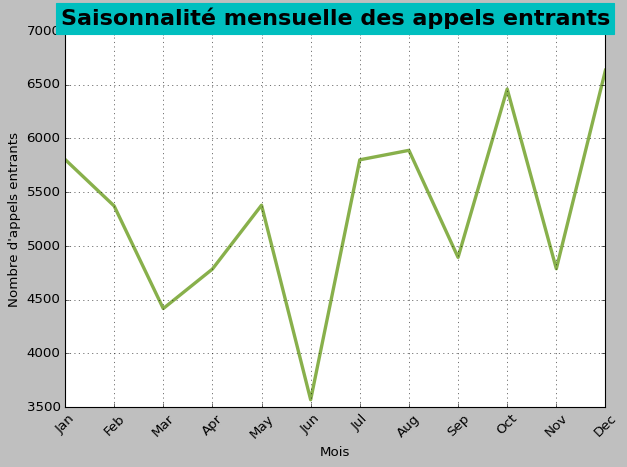

In [75]:
# allons y d'abord avec le nombre d'appels entrants
plt.figure()
plt.plot(mois_labels, df_monthly_sum['incoming_calls'], lw=3, color='#88b04b')
plt.title("Saisonnalité mensuelle des appels entrants", fontsize=20, fontweight='bold', backgroundcolor='c')
plt.xlabel("Mois")
plt.xticks(rotation=45)
plt.ylabel("Nombre d'appels entrants")
plt.tight_layout()
plt.grid()
plt.show()

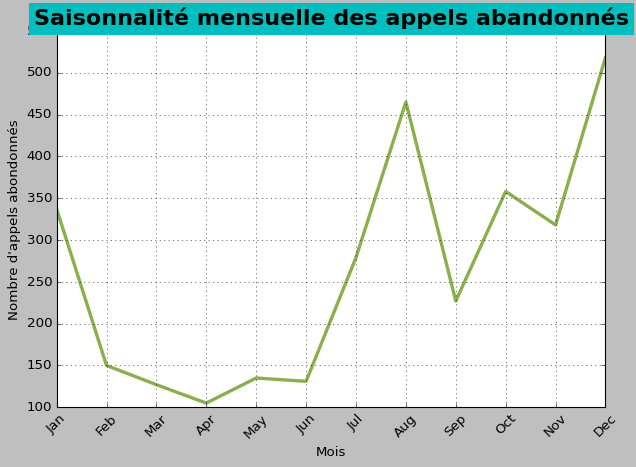

In [141]:
# Maintenant abandoned calls
plt.figure()
plt.plot(mois_labels, df_final['abandoned_calls'], lw=3, color='#88b04b')
plt.title("Saisonnalité mensuelle des appels abandonnés", fontsize=20, fontweight='bold', backgroundcolor='c')
plt.xlabel("Mois")
plt.xticks(rotation=45)
plt.ylabel("Nombre d'appels abondonnés")
plt.tight_layout()
plt.grid()
plt.savefig('line_month_abandoned.png', dpi=300)
plt.show()

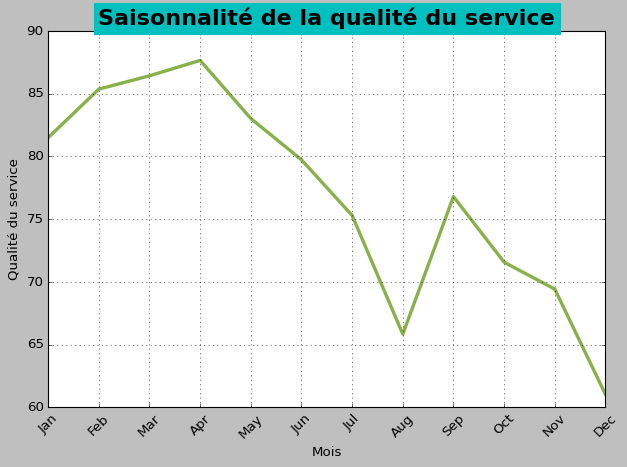

In [133]:
# le service_level_rate
plt.figure()
plt.plot(mois_labels, df_final['service_level_rate'], lw=3, color='#88b04b')
plt.title("Saisonnalité de la qualité du service", fontsize=20, fontweight='bold', backgroundcolor='c')
plt.xlabel("Mois")
plt.xticks(rotation=45)
plt.ylabel('Qualité du service')
plt.tight_layout()
plt.grid()
plt.savefig('line_quality_rate.png', dpi=300)
plt.show()

In [78]:
plt.style.use('ggplot')

In [79]:
df_final.sort_values(by='incoming_calls', ascending=False)

,incoming_calls,answered_calls,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),answer_rate,service_level_rate
date,,,,,,,,
2021-12-31,6634,6116,518,29.870968,138.612903,233.774194,92.670645,61.022258
2021-10-31,6459,6101,358,23.838710,133.741935,186.612903,94.907097,71.563548
2021-08-31,5889,5424,465,24.709677,145.064516,222.290323,91.782258,65.831935
2021-01-31,5805,5468,337,14.129032,132.903226,207.774194,94.693548,81.481290
2021-07-31,5801,5522,279,20.483871,141.064516,160.354839,95.633226,75.290000
2021-05-31,5379,5244,135,14.645161,135.451613,115.096774,97.313548,83.018065
2021-02-28,5372,5222,150,12.535714,140.321429,165.357143,97.331071,85.356071
2021-09-30,4894,4667,227,19.933333,148.233333,165.133333,96.026667,76.788333
2021-11-30,4788,4470,318,24.033333,138.033333,222.533333,93.164667,69.415333


In [80]:
df_monthly_sum.sort_values(by='incoming_calls', ascending=False)

,incoming_calls,answered_calls,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds)
date,,,,,,
2021-12-31,6634,6116,518,926,4297,7247
2021-10-31,6459,6101,358,739,4146,5785
2021-08-31,5889,5424,465,766,4497,6891
2021-01-31,5805,5468,337,438,4120,6441
2021-07-31,5801,5522,279,635,4373,4971
2021-05-31,5379,5244,135,454,4199,3568
2021-02-28,5372,5222,150,351,3929,4630
2021-09-30,4894,4667,227,598,4447,4954
2021-11-30,4788,4470,318,721,4141,6676


In [81]:
df_final.index = pd.to_datetime(df_final.index)

In [82]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [135]:
plt.style.use('ggplot')

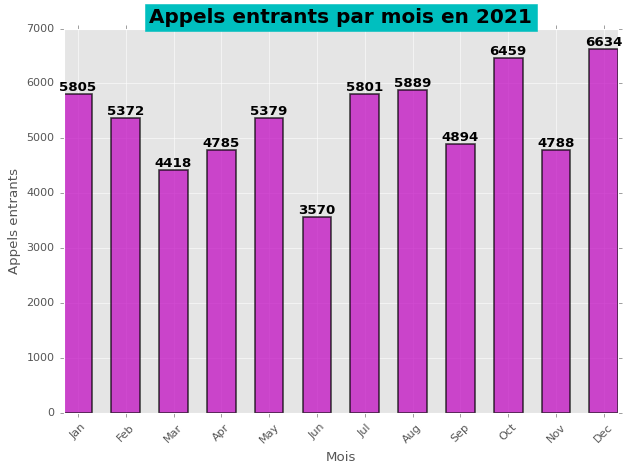

In [84]:
# Procédons à la création de graphique en barres pour une meilleure comparaison des métriques
# incoming calls
plt.figure()
bars = plt.bar(mois_labels, df_final['incoming_calls'], width=0.6, color='m', edgecolor='k', alpha=0.7, lw=1.5)
plt.title("Appels entrants par mois en 2021", fontsize=18, fontweight='bold', backgroundcolor='c')

# Ajouter les valeurs associé à chaque barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
             ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')
plt.xlabel("Mois")
plt.xticks(rotation=45)
plt.ylabel("Appels entrants")
plt.tight_layout()
plt.savefig('incoming_calls_month.png', dpi=300)
plt.show()

In [85]:
df_final

,incoming_calls,answered_calls,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),answer_rate,service_level_rate
date,,,,,,,,
2021-01-31,5805,5468,337,14.129032,132.903226,207.774194,94.693548,81.481290
2021-02-28,5372,5222,150,12.535714,140.321429,165.357143,97.331071,85.356071
2021-03-31,4418,4291,127,10.967742,129.064516,129.000000,96.591290,86.416774
2021-04-30,4785,4680,105,10.833333,131.266667,100.100000,97.845000,87.644667
2021-05-31,5379,5244,135,14.645161,135.451613,115.096774,97.313548,83.018065
2021-06-30,3570,3439,131,17.566667,143.833333,144.633333,97.090000,79.725000
2021-07-31,5801,5522,279,20.483871,141.064516,160.354839,95.633226,75.290000
2021-08-31,5889,5424,465,24.709677,145.064516,222.290323,91.782258,65.831935
2021-09-30,4894,4667,227,19.933333,148.233333,165.133333,96.026667,76.788333


In [86]:
df_final.sort_values(by='incoming_calls', ascending=False)

,incoming_calls,answered_calls,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),answer_rate,service_level_rate
date,,,,,,,,
2021-12-31,6634,6116,518,29.870968,138.612903,233.774194,92.670645,61.022258
2021-10-31,6459,6101,358,23.838710,133.741935,186.612903,94.907097,71.563548
2021-08-31,5889,5424,465,24.709677,145.064516,222.290323,91.782258,65.831935
2021-01-31,5805,5468,337,14.129032,132.903226,207.774194,94.693548,81.481290
2021-07-31,5801,5522,279,20.483871,141.064516,160.354839,95.633226,75.290000
2021-05-31,5379,5244,135,14.645161,135.451613,115.096774,97.313548,83.018065
2021-02-28,5372,5222,150,12.535714,140.321429,165.357143,97.331071,85.356071
2021-09-30,4894,4667,227,19.933333,148.233333,165.133333,96.026667,76.788333
2021-11-30,4788,4470,318,24.033333,138.033333,222.533333,93.164667,69.415333


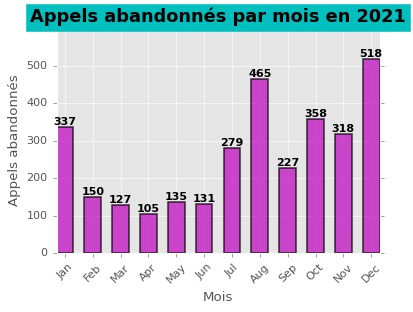

In [138]:
# answered_calls
plt.figure(figsize=(5, 4))
bars = plt.bar(mois_labels, df_final['abandoned_calls'], color='m', width=0.6, edgecolor='k', alpha=0.7, lw=1.5)
plt.title("Appels abandonnés par mois en 2021", fontsize=16, fontweight='bold', backgroundcolor='c')
plt.xlabel("Mois")
# Ajout des valeurs au dessus de chaque barre
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
      ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel("Appels abandonnés")
plt.tight_layout()
plt.savefig('abandoned_month1.png', dpi=300)
plt.show()

In [88]:
df_final.head()

,incoming_calls,answered_calls,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),answer_rate,service_level_rate
date,,,,,,,,
2021-01-31,5805,5468,337,14.129032,132.903226,207.774194,94.693548,81.481290
2021-02-28,5372,5222,150,12.535714,140.321429,165.357143,97.331071,85.356071
2021-03-31,4418,4291,127,10.967742,129.064516,129.000000,96.591290,86.416774
2021-04-30,4785,4680,105,10.833333,131.266667,100.100000,97.845000,87.644667
2021-05-31,5379,5244,135,14.645161,135.451613,115.096774,97.313548,83.018065


In [89]:
df_final.head()

,incoming_calls,answered_calls,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),answer_rate,service_level_rate
date,,,,,,,,
2021-01-31,5805,5468,337,14.129032,132.903226,207.774194,94.693548,81.481290
2021-02-28,5372,5222,150,12.535714,140.321429,165.357143,97.331071,85.356071
2021-03-31,4418,4291,127,10.967742,129.064516,129.000000,96.591290,86.416774
2021-04-30,4785,4680,105,10.833333,131.266667,100.100000,97.845000,87.644667
2021-05-31,5379,5244,135,14.645161,135.451613,115.096774,97.313548,83.018065


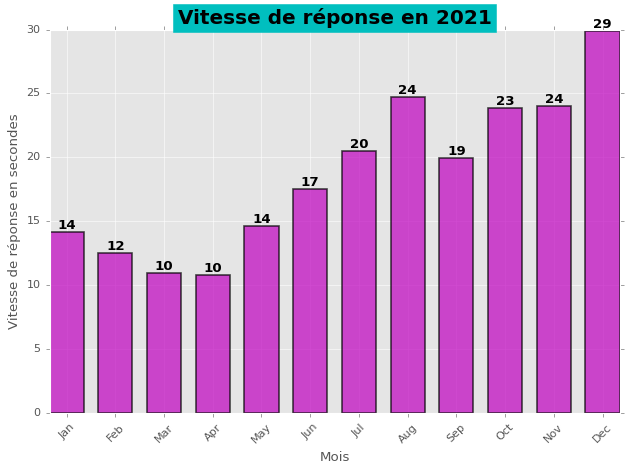

In [90]:
# answeer speed
plt.figure()
bars = plt.bar(mois_labels, df_final['answer_speed(seconds)'], color='m', width=0.7, alpha=0.7, edgecolor='k', lw=1.5)
plt.title("Vitesse de réponse en 2021", fontsize=18, fontweight='bold', backgroundcolor='c')
plt.xlabel("Mois")
plt.xticks(rotation=45)
plt.ylabel("Vitesse de réponse en secondes")
# Ajout des valeurs au dessus des barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
        ha='center', va='bottom', fontsize=12, color='black',fontweight='bold')
plt.tight_layout()
plt.savefig('answer_time_month.png', dpi=300)
plt.show()

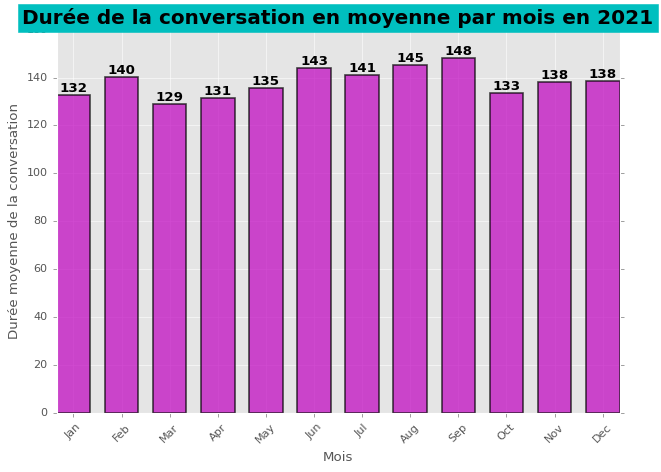

In [91]:
# talk duration
plt.figure()
bars = plt.bar(mois_labels, df_final['talk_duration(seconds)'], color='m', width=0.7, edgecolor='k', alpha=0.7, lw=1.5)
plt.title("Durée de la conversation en moyenne par mois en 2021", fontsize=18, fontweight='bold', backgroundcolor='c')
plt.xlabel("Mois")
plt.xticks(rotation=45)
plt.ylabel("Durée moyenne de la conversation")
# Ajout des valeurs au dessus des barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
        ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')
plt.tight_layout()
plt.show()

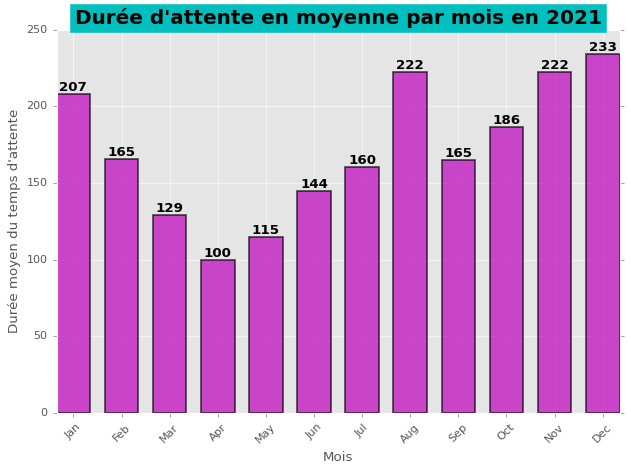

In [92]:
# waiting time
plt.figure()
bars = plt.bar(mois_labels, df_final['waiting_time(seconds)'], color='m', width=0.7, edgecolor='k', alpha=0.7, lw=1.5)
plt.title("Durée d'attente en moyenne par mois en 2021", fontsize=18, fontweight='bold', backgroundcolor='c')
plt.xlabel("Mois")
plt.xticks(rotation=45)
plt.ylabel("Durée moyen du temps d'attente")
# Ajout des valeurs au dessus des barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
         ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.tight_layout()
plt.savefig('waiting_time_month.png', dpi=300)
plt.show()

In [93]:
df_final.head()

,incoming_calls,answered_calls,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),answer_rate,service_level_rate
date,,,,,,,,
2021-01-31,5805,5468,337,14.129032,132.903226,207.774194,94.693548,81.481290
2021-02-28,5372,5222,150,12.535714,140.321429,165.357143,97.331071,85.356071
2021-03-31,4418,4291,127,10.967742,129.064516,129.000000,96.591290,86.416774
2021-04-30,4785,4680,105,10.833333,131.266667,100.100000,97.845000,87.644667
2021-05-31,5379,5244,135,14.645161,135.451613,115.096774,97.313548,83.018065


In [94]:
# Par jour maintenant
df_day

,incoming_calls,answered_calls,abandoned_calls
day_of_week,,,
Wednesday,11028,10385,643
Friday,10454,9924,530
Saturday,10369,9827,542
Sunday,10257,9726,531
Thursday,10077,9641,436
Monday,9413,9029,384
Tuesday,2196,2112,84


In [95]:
df.head()

,date,incoming_calls,answered_calls,answer_rate,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate,day_of_week,month
0,2021-01-01,217,204,94.01,13,17,134,165,76.28,Friday,January
1,2021-01-02,200,182,91.00,18,20,142,415,72.73,Saturday,January
2,2021-01-03,216,198,91.67,18,18,158,230,74.30,Sunday,January
3,2021-01-04,155,145,93.55,10,15,149,192,79.61,Monday,January
4,2021-01-05,37,37,100.00,0,3,126,35,97.30,Tuesday,January


In [96]:
# On va essayer d'ajouter les autres colonnes à df_day pour pouvoir faire plus d'insights
df_day_mean = df.groupby('day_of_week')[['answer_rate', 'answer_speed(seconds)', 'talk_duration(seconds)', 'waiting_time(seconds)', 'service_level_rate']].mean()

<ipython-input-96-278178773ca7>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_day_mean = df.groupby('day_of_week')[['answer_rate', 'answer_speed(seconds)', 'talk_duration(seconds)', 'waiting_time(seconds)', 'service_level_rate']].mean()


In [97]:
df_day_mean

,answer_rate,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate
day_of_week,,,,,
Friday,95.136981,19.886792,137.886792,190.811321,75.966604
Monday,96.060769,18.038462,138.596154,170.480769,77.862500
Saturday,95.348846,19.000000,140.519231,190.250000,76.937115
Sunday,95.087115,18.557692,135.711538,181.288462,76.296731
Thursday,95.575000,19.192308,139.096154,173.038462,76.232692
Tuesday,96.213077,16.750000,138.923077,99.000000,78.507308
Wednesday,94.371731,19.346154,135.903846,193.461538,76.361346


In [98]:
# d'abord réorganisons les jours dans un ordre chronologique
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_day = df_day.reindex(ordered_days)

In [99]:
# Faisons la même chose pour le df_day_mean
df_day_mean = df_day_mean.reindex(ordered_days)

In [100]:
# Maintenant fusionnons tout ça pour avoit toutes les métriques par jour de la semaine
df_weekday = df_day.merge(df_day_mean, how='inner', on='day_of_week')

In [101]:
df_weekday

,incoming_calls,answered_calls,abandoned_calls,answer_rate,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate
day_of_week,,,,,,,,
Monday,9413,9029,384,96.060769,18.038462,138.596154,170.480769,77.862500
Tuesday,2196,2112,84,96.213077,16.750000,138.923077,99.000000,78.507308
Wednesday,11028,10385,643,94.371731,19.346154,135.903846,193.461538,76.361346
Thursday,10077,9641,436,95.575000,19.192308,139.096154,173.038462,76.232692
Friday,10454,9924,530,95.136981,19.886792,137.886792,190.811321,75.966604
Saturday,10369,9827,542,95.348846,19.000000,140.519231,190.250000,76.937115
Sunday,10257,9726,531,95.087115,18.557692,135.711538,181.288462,76.296731


In [102]:
df_day.head()

,incoming_calls,answered_calls,abandoned_calls
day_of_week,,,
Monday,9413,9029,384
Tuesday,2196,2112,84
Wednesday,11028,10385,643
Thursday,10077,9641,436
Friday,10454,9924,530


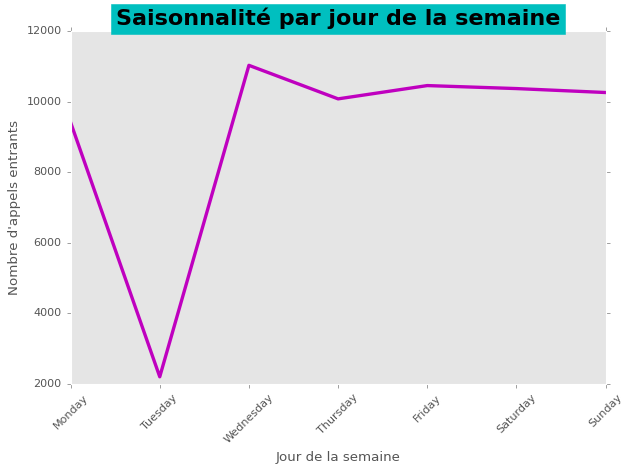

In [103]:
# les appels entrants par jour de la semaine
plt.figure()
plt.plot(df_day.index, df_day['incoming_calls'], lw=3, color='m')
plt.title("Saisonnalité par jour de la semaine", fontsize=20, fontweight='bold', backgroundcolor='c')
plt.xlabel("Jour de la semaine")
plt.xticks(rotation=45)
plt.ylabel("Nombre d'appels entrants")
plt.tight_layout()
plt.grid()
plt.show()

In [104]:
df_weekday.head()

,incoming_calls,answered_calls,abandoned_calls,answer_rate,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate
day_of_week,,,,,,,,
Monday,9413,9029,384,96.060769,18.038462,138.596154,170.480769,77.862500
Tuesday,2196,2112,84,96.213077,16.750000,138.923077,99.000000,78.507308
Wednesday,11028,10385,643,94.371731,19.346154,135.903846,193.461538,76.361346
Thursday,10077,9641,436,95.575000,19.192308,139.096154,173.038462,76.232692
Friday,10454,9924,530,95.136981,19.886792,137.886792,190.811321,75.966604


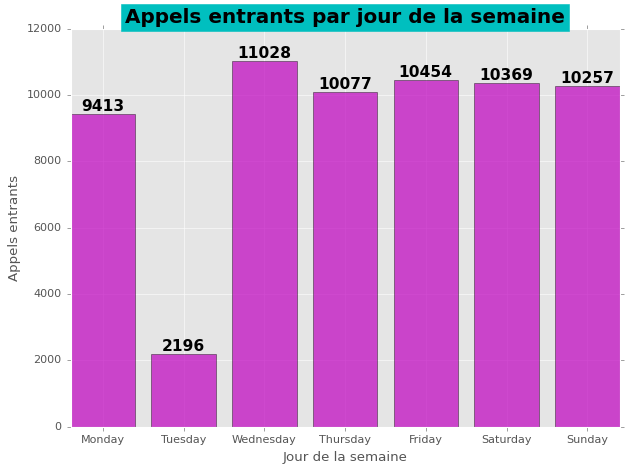

In [105]:
# les appels entrants par jour de la semaine
plt.figure()
bars = plt.bar(df_weekday.index, df_weekday['incoming_calls'], width=0.8, color='m', edgecolor='k', alpha=0.7)
plt.title("Appels entrants par jour de la semaine", fontsize=18, fontweight='bold', backgroundcolor='c')
plt.xlabel('Jour de la semaine')
plt.ylabel("Appels entrants")
# Ajout des valeurs au dessus des barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
      ha='center', va='bottom', fontsize=14, color='black', fontweight='bold')
plt.tight_layout()
plt.savefig('incoming_calls_day.png', dpi=300)
plt.show()

In [106]:
df_weekday.sort_values(by='incoming_calls', ascending=False)

,incoming_calls,answered_calls,abandoned_calls,answer_rate,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate
day_of_week,,,,,,,,
Wednesday,11028,10385,643,94.371731,19.346154,135.903846,193.461538,76.361346
Friday,10454,9924,530,95.136981,19.886792,137.886792,190.811321,75.966604
Saturday,10369,9827,542,95.348846,19.000000,140.519231,190.250000,76.937115
Sunday,10257,9726,531,95.087115,18.557692,135.711538,181.288462,76.296731
Thursday,10077,9641,436,95.575000,19.192308,139.096154,173.038462,76.232692
Monday,9413,9029,384,96.060769,18.038462,138.596154,170.480769,77.862500
Tuesday,2196,2112,84,96.213077,16.750000,138.923077,99.000000,78.507308


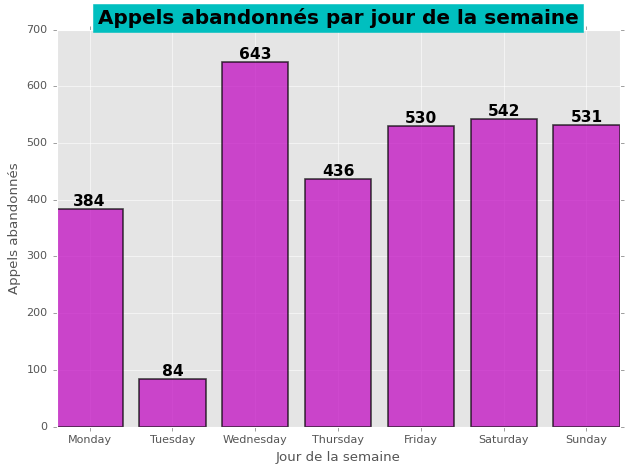

In [107]:
# les appels abandonnés par jour de la semaine
plt.figure()
bars = plt.bar(df_weekday.index, df_weekday['abandoned_calls'], width=0.8, color='m', alpha=0.7, edgecolor='k', lw=1.5)
plt.title("Appels abandonnés par jour de la semaine", fontsize=18, fontweight='bold', backgroundcolor='c')
plt.xlabel("Jour de la semaine")
plt.ylabel("Appels abandonnés")
# Ajout des valeurs au dessus des barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
      ha='center', va='bottom', fontsize=14, color='black', fontweight='bold')
plt.tight_layout()
plt.savefig('abandoned_calls_day.png', dpi=300)
plt.show()

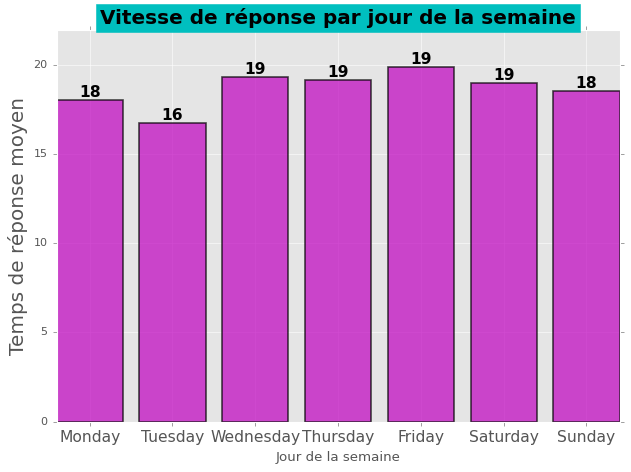

In [108]:
# answer_speed
plt.figure()
bars = plt.bar(df_weekday.index, df_weekday['answer_speed(seconds)'], color='m', edgecolor='k', alpha=0.7, lw=1.5)
plt.title("Vitesse de réponse par jour de la semaine", fontsize=18, fontweight='bold', backgroundcolor='c')
plt.xlabel("Jour de la semaine")
plt.xticks(fontsize=14)
plt.ylabel("Temps de réponse moyen", fontsize=18)
plt.ylim(0, 22)
# Ajout des valeurs au dessus des barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
      ha='center', va='bottom', fontsize=14, color='black', fontweight='bold')
plt.tight_layout()
plt.show()

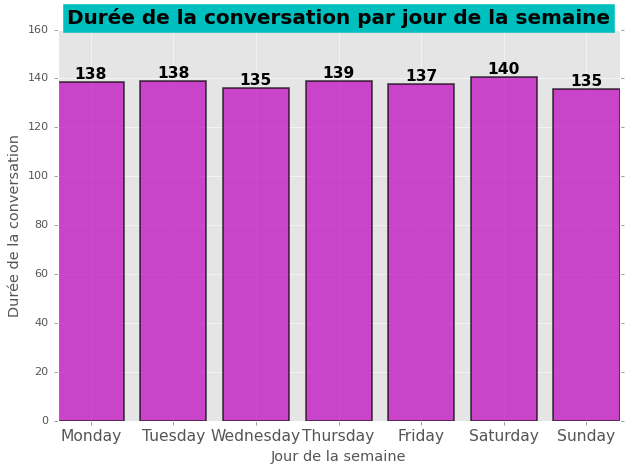

In [109]:
# talk_duration
plt.figure()
bars = plt.bar(df_weekday.index, df_weekday['talk_duration(seconds)'], color='m', edgecolor='k', alpha=0.7, lw=1.5)
plt.title("Durée de la conversation par jour de la semaine", fontsize=18, fontweight='bold', backgroundcolor='c')
plt.xlabel("Jour de la semaine", fontsize=13)
plt.xticks(fontsize=14)
plt.ylabel("Durée de la conversation", fontsize=13)
# Ajout des valeurs au dessus des barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
      ha='center', va='bottom', fontsize=14, color='black', fontweight='bold')
plt.tight_layout()
plt.show()

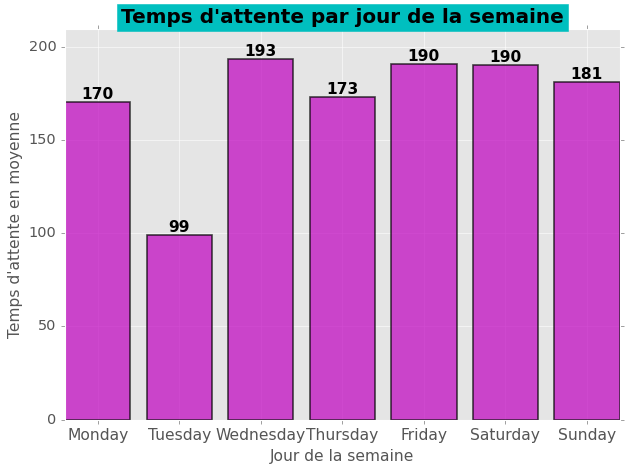

In [110]:
# waiting time par jour de la semaine
plt.figure()
bars = plt.bar(df_weekday.index, df_weekday['waiting_time(seconds)'], color='m', alpha=0.7, edgecolor='k', lw=1.5)
plt.title("Temps d'attente par jour de la semaine", fontsize=18, fontweight='bold', backgroundcolor='c')
plt.xlabel("Jour de la semaine", fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Temps d'attente en moyenne", fontsize=14)
plt.yticks(fontsize=13)
plt.ylim(0, 210)
# Ajout des valeurs au dessus les barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
      ha='center', va='bottom', fontsize=14, color='black', fontweight='bold')
plt.tight_layout()
plt.show()

In [143]:
# Utilisons le style de seaborn
plt.style.use('fivethirtyeight')

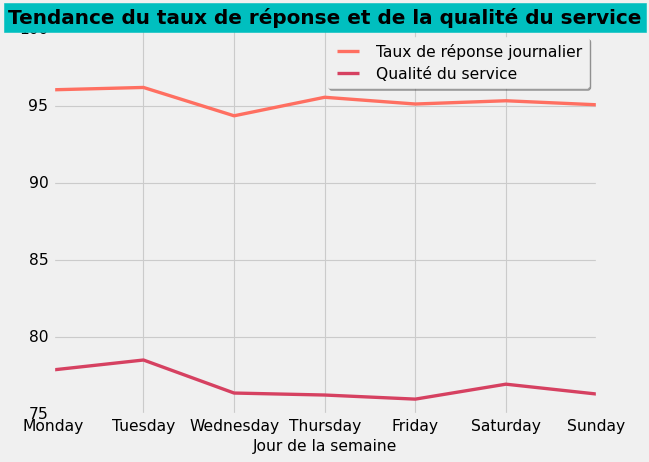

In [144]:
# Maintenant on va observer le answer rate et le service_level_rate par jour de la semaine
# answer rate
plt.figure()
plt.plot(df_weekday.index, df_weekday['answer_rate'], c='#ff6f61', lw=3, label="Taux de réponse journalier")
plt.title("Tendance du taux de réponse et de la qualité du service", fontsize=18, fontweight='bold', backgroundcolor='c')
plt.xlabel("Jour de la semaine", fontsize=14)
plt.xticks(fontsize=14)
plt.plot(df_weekday.index, df_weekday['service_level_rate'], c='#d64161', label="Qualité du service", lw=3)
plt.tight_layout()
plt.legend(fontsize=14, frameon=True, shadow=True)
plt.show()

In [113]:
df_weekday.head()

,incoming_calls,answered_calls,abandoned_calls,answer_rate,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate
day_of_week,,,,,,,,
Monday,9413,9029,384,96.060769,18.038462,138.596154,170.480769,77.862500
Tuesday,2196,2112,84,96.213077,16.750000,138.923077,99.000000,78.507308
Wednesday,11028,10385,643,94.371731,19.346154,135.903846,193.461538,76.361346
Thursday,10077,9641,436,95.575000,19.192308,139.096154,173.038462,76.232692
Friday,10454,9924,530,95.136981,19.886792,137.886792,190.811321,75.966604


# **Corrélations entre les différentes variables**

In [114]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [115]:
plt.style.use('seaborn-v0_8-dark')

In [116]:
df.head()

,date,incoming_calls,answered_calls,answer_rate,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate,day_of_week,month
0,2021-01-01,217,204,94.01,13,17,134,165,76.28,Friday,January
1,2021-01-02,200,182,91.00,18,20,142,415,72.73,Saturday,January
2,2021-01-03,216,198,91.67,18,18,158,230,74.30,Sunday,January
3,2021-01-04,155,145,93.55,10,15,149,192,79.61,Monday,January
4,2021-01-05,37,37,100.00,0,3,126,35,97.30,Tuesday,January


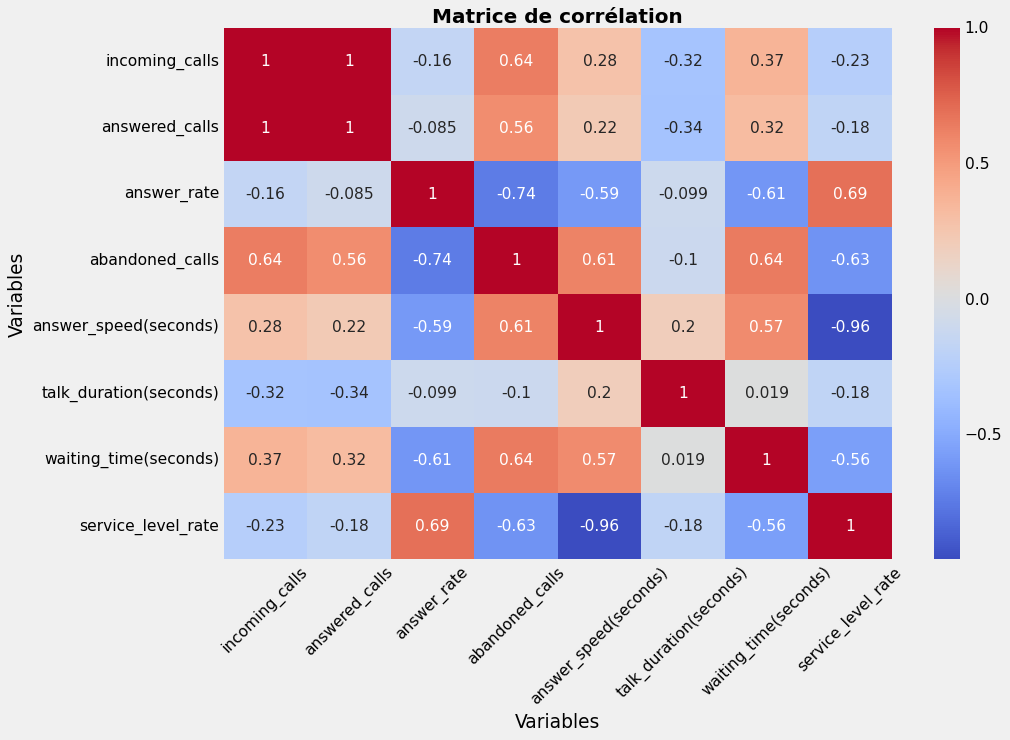

In [147]:
# Procédons a la création d'une matrice de corrélation
correlation_matrix = df.corr(numeric_only=True, method='pearson')
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation", fontsize=18, fontweight='bold')
plt.xlabel("Variables")
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel("Variables")
plt.savefig('corr1.png', dpi=300, bbox_inches='tight')
plt.show()

In [118]:
plt.style.use('classic')

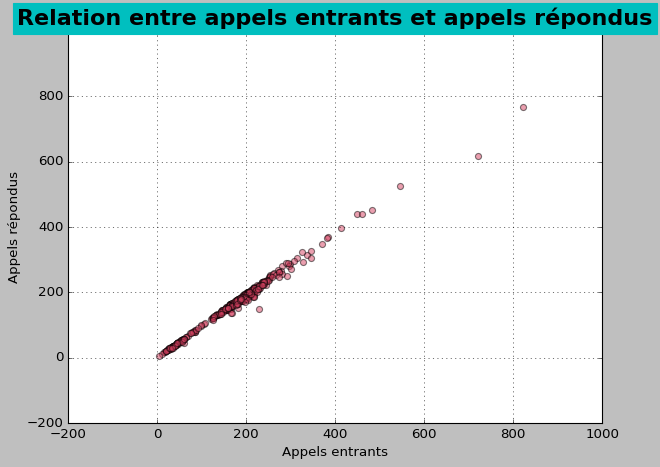

In [119]:
# je viens d'avoir une corrélation parfaite entre le incoming calls et le answered calls pour cela je compte faire un nuage de point pour m' en assurer
plt.scatter(x=df['incoming_calls'], y=df['answered_calls'], s=30, c='#d64161', alpha=0.5)
plt.title('Relation entre appels entrants et appels répondus', fontsize=20, fontweight='bold', backgroundcolor='c')
plt.xlabel("Appels entrants")
plt.ylabel("Appels répondus")
plt.tight_layout()
plt.grid()
plt.show()

In [120]:
df_final.head()

,incoming_calls,answered_calls,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),answer_rate,service_level_rate
date,,,,,,,,
2021-01-31,5805,5468,337,14.129032,132.903226,207.774194,94.693548,81.481290
2021-02-28,5372,5222,150,12.535714,140.321429,165.357143,97.331071,85.356071
2021-03-31,4418,4291,127,10.967742,129.064516,129.000000,96.591290,86.416774
2021-04-30,4785,4680,105,10.833333,131.266667,100.100000,97.845000,87.644667
2021-05-31,5379,5244,135,14.645161,135.451613,115.096774,97.313548,83.018065


In [121]:
df_final.tail(-5)

,incoming_calls,answered_calls,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),answer_rate,service_level_rate
date,,,,,,,,
2021-06-30,3570,3439,131,17.566667,143.833333,144.633333,97.090000,79.725000
2021-07-31,5801,5522,279,20.483871,141.064516,160.354839,95.633226,75.290000
2021-08-31,5889,5424,465,24.709677,145.064516,222.290323,91.782258,65.831935
2021-09-30,4894,4667,227,19.933333,148.233333,165.133333,96.026667,76.788333
2021-10-31,6459,6101,358,23.838710,133.741935,186.612903,94.907097,71.563548
2021-11-30,4788,4470,318,24.033333,138.033333,222.533333,93.164667,69.415333
2021-12-31,6634,6116,518,29.870968,138.612903,233.774194,92.670645,61.022258


In [122]:
df_weekday.sort_values(by='incoming_calls', ascending=False)

,incoming_calls,answered_calls,abandoned_calls,answer_rate,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate
day_of_week,,,,,,,,
Wednesday,11028,10385,643,94.371731,19.346154,135.903846,193.461538,76.361346
Friday,10454,9924,530,95.136981,19.886792,137.886792,190.811321,75.966604
Saturday,10369,9827,542,95.348846,19.000000,140.519231,190.250000,76.937115
Sunday,10257,9726,531,95.087115,18.557692,135.711538,181.288462,76.296731
Thursday,10077,9641,436,95.575000,19.192308,139.096154,173.038462,76.232692
Monday,9413,9029,384,96.060769,18.038462,138.596154,170.480769,77.862500
Tuesday,2196,2112,84,96.213077,16.750000,138.923077,99.000000,78.507308


In [123]:
# essayons de voir le jour de la semaine le plus actif mais pour chaque mois
df_month_day = df.groupby(['month', 'day_of_week']).agg({
    'incoming_calls': 'sum',
    'answered_calls': 'sum',
    'abandoned_calls': 'sum',
    'answer_speed(seconds)': 'mean',
    'talk_duration(seconds)': 'mean',
    'waiting_time(seconds)': 'mean',
    'answer_rate': 'mean',
    'service_level_rate': 'mean'
})

<ipython-input-123-5be79e635d77>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_month_day = df.groupby(['month', 'day_of_week']).agg({


In [124]:
df_month_day.tail(7)

incoming_calls  answered_calls  abandoned_calls  \
month     day_of_week                                                    
September Friday                  807             759               48   
          Monday                  622             595               27   
          Saturday                779             748               31   
          Sunday                  643             614               29   
          Thursday                904             869               35   
          Tuesday                 106             104                2   
          Wednesday              1033             978               55   

                       answer_speed(seconds)  talk_duration(seconds)  \
month     day_of_week                                                  
September Friday                       26.50                  148.50   
          Monday                       18.00                  144.25   
          Saturday                     19.25                  147.50   
          Sunday                       18.25                  156.25   
          Thursday                     19.60                  149.80   
          Tuesday                      18.00                  143.00   
          Wednesday                    20.00                  148.00   

                       waiting_time(seconds)  answer_rate  service_level_rate  
month     day_of_week                                                          
September Friday                      232.50      94.0450             66.0950  
          Monday                      135.25      96.6875             77.5150  
          Saturday                    149.25      96.0150             80.0750  
          Sunday                      152.00      96.5025             79.9425  
          Thursday                    159.60      96.2320             76.1240  
          Tuesday                      76.00      98.0525             80.0325  
          Wednesday                   235.20      94.8860             77.6780

In [125]:
df_month_day.loc['December', :]

,incoming_calls,answered_calls,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),answer_rate,service_level_rate
day_of_week,,,,,,,,
Friday,1190,1108,82,30.80,143.40,260.40,92.8740,61.3700
Monday,676,637,39,28.25,144.00,249.00,94.1250,63.3625
Saturday,1351,1199,152,38.00,131.75,295.75,90.6700,52.8450
Sunday,908,841,67,32.00,136.25,290.25,92.7975,57.6450
Thursday,1129,1069,60,28.80,138.20,180.80,94.6220,64.1500
Tuesday,211,198,13,23.75,138.25,158.00,92.2800,66.0700
Wednesday,1169,1064,105,28.00,137.60,213.80,91.1640,60.8800


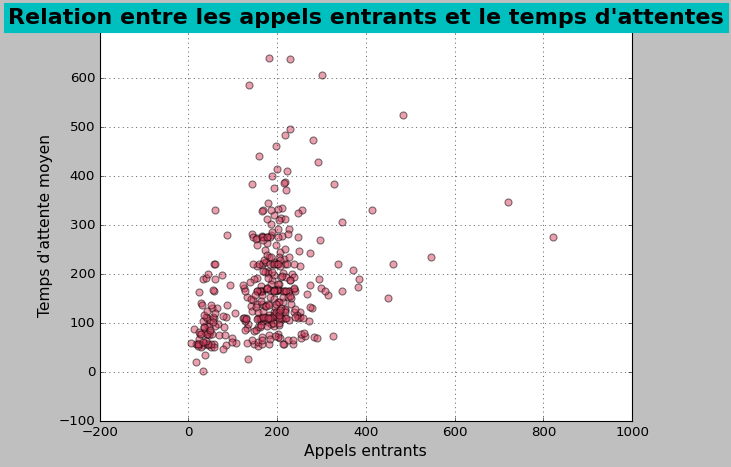

In [126]:
# J'ai bien envie de voir la corrélation linéaire entre incoming_calls et waiting_time(seconds)
plt.figure()
plt.scatter(x=df['incoming_calls'], y=df['waiting_time(seconds)'], s=40, c='#d64161', alpha=0.5)
plt.title("Relation entre les appels entrants et le temps d'attentes", fontsize=20, fontweight='bold', backgroundcolor='c')
plt.xlabel("Appels entrants", fontsize=14)
plt.ylabel("Temps d'attente moyen", fontsize=14)
plt.tight_layout()
plt.grid()
plt.show()

In [127]:
df_final[['incoming_calls', 'service_level_rate', 'answer_rate']].sort_values(by='incoming_calls', ascending=False)

,incoming_calls,service_level_rate,answer_rate
date,,,
2021-12-31,6634,61.022258,92.670645
2021-10-31,6459,71.563548,94.907097
2021-08-31,5889,65.831935,91.782258
2021-01-31,5805,81.481290,94.693548
2021-07-31,5801,75.290000,95.633226
2021-05-31,5379,83.018065,97.313548
2021-02-28,5372,85.356071,97.331071
2021-09-30,4894,76.788333,96.026667
2021-11-30,4788,69.415333,93.164667


In [128]:
df_weekday.sort_values(by='incoming_calls', ascending=False)

,incoming_calls,answered_calls,abandoned_calls,answer_rate,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate
day_of_week,,,,,,,,
Wednesday,11028,10385,643,94.371731,19.346154,135.903846,193.461538,76.361346
Friday,10454,9924,530,95.136981,19.886792,137.886792,190.811321,75.966604
Saturday,10369,9827,542,95.348846,19.000000,140.519231,190.250000,76.937115
Sunday,10257,9726,531,95.087115,18.557692,135.711538,181.288462,76.296731
Thursday,10077,9641,436,95.575000,19.192308,139.096154,173.038462,76.232692
Monday,9413,9029,384,96.060769,18.038462,138.596154,170.480769,77.862500
Tuesday,2196,2112,84,96.213077,16.750000,138.923077,99.000000,78.507308


In [129]:
df_final.sort_values(by='incoming_calls', ascending=False)

,incoming_calls,answered_calls,abandoned_calls,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),answer_rate,service_level_rate
date,,,,,,,,
2021-12-31,6634,6116,518,29.870968,138.612903,233.774194,92.670645,61.022258
2021-10-31,6459,6101,358,23.838710,133.741935,186.612903,94.907097,71.563548
2021-08-31,5889,5424,465,24.709677,145.064516,222.290323,91.782258,65.831935
2021-01-31,5805,5468,337,14.129032,132.903226,207.774194,94.693548,81.481290
2021-07-31,5801,5522,279,20.483871,141.064516,160.354839,95.633226,75.290000
2021-05-31,5379,5244,135,14.645161,135.451613,115.096774,97.313548,83.018065
2021-02-28,5372,5222,150,12.535714,140.321429,165.357143,97.331071,85.356071
2021-09-30,4894,4667,227,19.933333,148.233333,165.133333,96.026667,76.788333
2021-11-30,4788,4470,318,24.033333,138.033333,222.533333,93.164667,69.415333


In [130]:
df_weekday.sort_values(by='incoming_calls', ascending=False)

,incoming_calls,answered_calls,abandoned_calls,answer_rate,answer_speed(seconds),talk_duration(seconds),waiting_time(seconds),service_level_rate
day_of_week,,,,,,,,
Wednesday,11028,10385,643,94.371731,19.346154,135.903846,193.461538,76.361346
Friday,10454,9924,530,95.136981,19.886792,137.886792,190.811321,75.966604
Saturday,10369,9827,542,95.348846,19.000000,140.519231,190.250000,76.937115
Sunday,10257,9726,531,95.087115,18.557692,135.711538,181.288462,76.296731
Thursday,10077,9641,436,95.575000,19.192308,139.096154,173.038462,76.232692
Monday,9413,9029,384,96.060769,18.038462,138.596154,170.480769,77.862500
Tuesday,2196,2112,84,96.213077,16.750000,138.923077,99.000000,78.507308
